# Import Libraries

In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,DirectoryIterator
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import backend as K
import os
import tensorflow as tf

# Generate Training Data

In [3]:
dir_ = os.path.join('Train_Final/leapGestRecog')

train_datagen = ImageDataGenerator(rescale=1/255,
                                  validation_split = 0.2)
#test_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(dir_,
                                                    target_size=(50, 50),
                                                    batch_size= 32,
                                                    class_mode='categorical',
                                                    shuffle=False,
                                                    subset = 'training')

test_generator = train_datagen.flow_from_directory(dir_,
                                                    target_size = (50, 50),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    shuffle=False,
                                                    subset = 'validation')



Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [4]:
x_train, y_train = next(train_generator)
x_test, y_test  = next(test_generator)

In [5]:
test_filepath = []
for filepath in test_generator.filepaths:
    filepath = filepath.replace('\\', '/')
    test_filepath.append(filepath)

# Build Custom Model

In [6]:
import keras
import keras.backend as K
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

model = keras.models.Sequential()

#model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(50, 50, 1)))
###
model.add(Conv2D(128, (5, 5), activation='relu', input_shape=(50, 50, 3)))
###
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

######
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))
######

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))
#####
model.add(Dense(128, activation='relu'))
#####
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
         optimizer = 'adam',
         metrics = ['accuracy'])

# history = model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test))
history = model.fit(train_generator, epochs = 10, batch_size=32)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 32)        0

# Predict an Image with Custom Model

In [47]:
import skimage
from skimage import io
from tensorflow.keras.preprocessing import image

url = 'Train_Final/leapGestRecog/00/10_down/frame_00_10_0056.png'

def read_and_transform_img(url):

    img = skimage.io.imread(url)
    img = skimage.transform.resize(img, (50,50,3))
    
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    return img

images = read_and_transform_img(url)

preds = model.predict(images)
prediction = np.argmax(preds)
pct = np.max(preds)

print(pct)

1/1 [==============================] - 0s 16ms/step
1.0


# LIME with Custom Model

In [48]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 30/1000 [00:00<00:04, 208.13it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 60/1000 [00:00<00:04, 214.53it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 90/1000 [00:00<00:04, 207.75it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 120/1000 [00:00<00:04, 212.76it/s]

1/1 [==============================] - 0s 16ms/step


 15%|█▌        | 150/1000 [00:00<00:03, 219.43it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 180/1000 [00:00<00:03, 222.50it/s]

1/1 [==============================] - 0s 19ms/step


 20%|██        | 203/1000 [00:00<00:03, 224.46it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 230/1000 [00:01<00:03, 214.62it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 260/1000 [00:01<00:03, 216.35it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 290/1000 [00:01<00:03, 211.94it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 320/1000 [00:01<00:03, 213.17it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 350/1000 [00:01<00:02, 217.99it/s]

1/1 [==============================] - 0s 17ms/step


 38%|███▊      | 380/1000 [00:01<00:02, 216.85it/s]

1/1 [==============================] - 0s 15ms/step


 41%|████      | 410/1000 [00:01<00:02, 219.35it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 440/1000 [00:02<00:02, 220.20it/s]

1/1 [==============================] - 0s 16ms/step


 47%|████▋     | 470/1000 [00:02<00:02, 220.93it/s]

1/1 [==============================] - 0s 16ms/step


 50%|█████     | 500/1000 [00:02<00:02, 219.41it/s]

1/1 [==============================] - 0s 17ms/step


 53%|█████▎    | 530/1000 [00:02<00:02, 218.48it/s]

1/1 [==============================] - 0s 16ms/step


 55%|█████▌    | 552/1000 [00:02<00:02, 216.65it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 580/1000 [00:02<00:01, 212.69it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 610/1000 [00:02<00:01, 216.12it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 640/1000 [00:02<00:01, 217.10it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 670/1000 [00:03<00:01, 214.62it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████   | 700/1000 [00:03<00:01, 217.76it/s]

1/1 [==============================] - 0s 16ms/step


 73%|███████▎  | 730/1000 [00:03<00:01, 218.50it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 760/1000 [00:03<00:01, 219.03it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▉  | 790/1000 [00:03<00:00, 216.30it/s]

1/1 [==============================] - 0s 17ms/step


 82%|████████▏ | 820/1000 [00:03<00:00, 217.26it/s]

1/1 [==============================] - 0s 18ms/step


 84%|████████▍ | 842/1000 [00:03<00:00, 217.78it/s]

1/1 [==============================] - 0s 16ms/step


 87%|████████▋ | 870/1000 [00:04<00:00, 213.31it/s]

1/1 [==============================] - 0s 17ms/step


 90%|█████████ | 900/1000 [00:04<00:00, 216.21it/s]

1/1 [==============================] - 0s 18ms/step


 93%|█████████▎| 930/1000 [00:04<00:00, 214.58it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▌| 960/1000 [00:04<00:00, 215.38it/s]

1/1 [==============================] - 0s 16ms/step


 99%|█████████▉| 990/1000 [00:04<00:00, 215.67it/s]

1/1 [==============================] - 0s 16ms/step


100%|██████████| 1000/1000 [00:04<00:00, 216.69it/s]


(-0.5, 49.5, 49.5, -0.5)

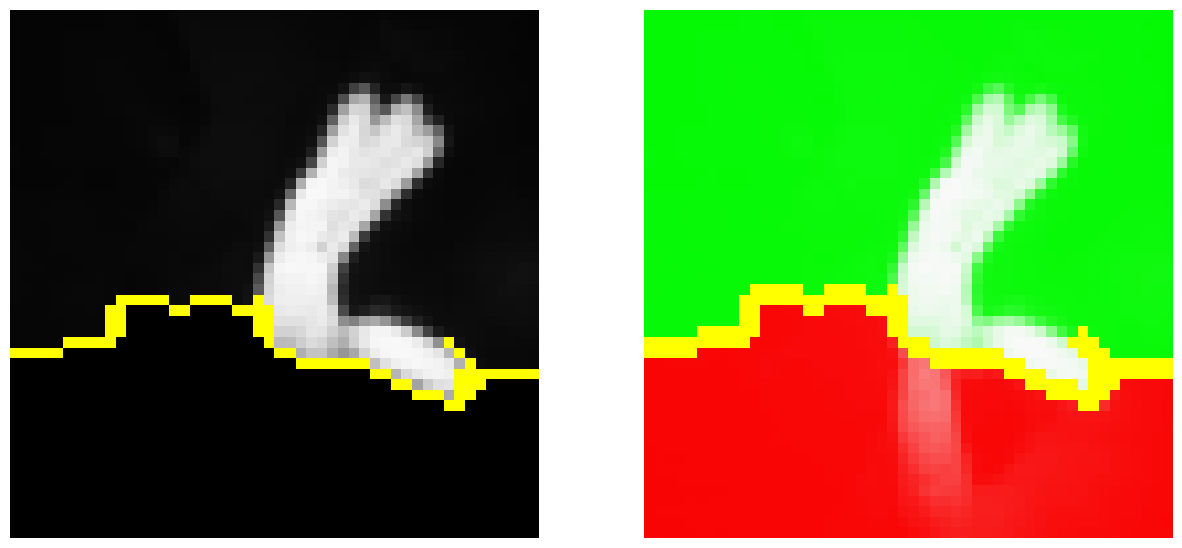

In [49]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

#plt.savefig('mask_default.png')


### Anchor Implementation (V1)

In [28]:
import anchor
from anchor import anchor_image
import matplotlib.pyplot as plt
import numpy as np

In [34]:
from anchor_image import AnchorImageExplainer
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a trained CNN model called `model`

# Function to predict the class labels using your CNN model
def predict_fn(images):
    # Preprocess the images if needed
    preprocessed_images = preprocess(images)

    # Predict the class labels using your CNN model
    predictions = model.predict(preprocessed_images)

    # Return the predicted probabilities or class labels
    return predictions

# Generate explanations for a given image
def explain_image(image):
    # Initialize the anchor explainer
    explainer = AnchorImageExplainer()

    # Generate the anchor explanation
    explanation = explainer.explain_instance(image, predict_fn, threshold=0.95)

    # Get the anchor conditions and predicted class
    conditions, predicted_class = explanation.get_explanation()

    # Print the anchor conditions and predicted class
    print('Anchor Conditions:', conditions)
    print('Predicted Class:', predicted_class)

    # Visualize the original image and anchor conditions
    fig, axes = plt.subplots(1, len(conditions) + 1, figsize=(10, 4))
    axes[0].imshow(image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    for i, condition in enumerate(conditions):
        mask = condition.image * 255
        axes[i+1].imshow(mask, cmap='gray')
        axes[i+1].set_title('Anchor Condition {}'.format(i+1))
        axes[i+1].axis('off')

    plt.show()

# Example usage:
image = load_image('example_image.jpg')  # Load your image
explain_image(image)


ModuleNotFoundError: No module named 'anchor_image'

In [36]:
from anchor import anchor_image
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a trained CNN model called `model`

# Function to preprocess the image
def preprocess_image(image):
    # Preprocess the image as required (e.g., resizing, normalization)
    # Return the preprocessed image
    pass

# Function to predict the class labels using your CNN model
def predict_fn(images):
    # Preprocess the images if needed
    preprocessed_images = np.array([preprocess_image(image) for image in images])

    # Predict the class labels using your CNN model
    predictions = model.predict(preprocessed_images)

    # Return the predicted probabilities or class labels
    return predictions

# Function to load an image
def load_image(image_path):
    # Load the image from the given path
    # Return the loaded image
    pass

# Generate explanations for a given image
def explain_image(image_path):
    # Load the image
    image = load_image(image_path)

    # Initialize the anchor explainer
    explainer = anchor_image.AnchorImageExplainer()

    # Generate the anchor explanation
    explanation = explainer.explain_instance(image, predict_fn, threshold=0.95)

    # Get the anchor conditions and predicted class
    conditions, predicted_class = explanation.get_explanation()

    # Print the anchor conditions and predicted class
    print('Anchor Conditions:', conditions)
    print('Predicted Class:', predicted_class)

    # Visualize the original image and anchor conditions
    fig, axes = plt.subplots(1, len(conditions) + 1, figsize=(10, 4))
    axes[0].imshow(image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    for i, condition in enumerate(conditions):
        mask = condition.image * 255
        axes[i+1].imshow(mask, cmap='gray')
        axes[i+1].set_title('Anchor Condition {}'.format(i+1))
        axes[i+1].axis('off')

    plt.show()

# Example usage:
image_path = 'example_image.jpg'  # Path to your image
explain_image(image_path)


AttributeError: module 'anchor.anchor_image' has no attribute 'AnchorImageExplainer'

### Anchor Implementation (V2)

In [37]:
import anchor
import anchor.anchor_image

In [38]:
import skimage.io
import skimage.transform
from skimage import color
def transform_img_fast(path):
    img = skimage.io.imread(path)
    if len(img.shape) != 3:
        img = skimage.color.gray2rgb(img)
    if img.shape[2] == 4:
        img = color.rgba2rgb(img)
    short_egde = min(img.shape[:2])
    yy = int((img.shape[0] - short_egde) / 2)
    xx = int((img.shape[1] - short_egde) / 2)
    crop_img = img[yy: yy + short_egde, xx: xx + short_egde]
    return (skimage.transform.resize(crop_img, (299, 299)) - 0.5) * 2
def transform_img_fn_fast(paths):
    out = []
    for i, path in enumerate(paths):
        if i % 100 == 0:
            print(i)
        out.append(transform_img_fast(path))
    return np.array(out)

In [43]:
explainer = anchor.anchor_image.AnchorImage('Train_Final/leapGestRecog/01/01_palm',
                                                transform_img_fn=transform_img_fn_fast, n=5000)

0
100


In [46]:
# explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
#                                          top_labels=3, hide_color=0, num_samples=1000)

segments, exp = explainer.explain_instance(images[0], model.predict, threshold=0.95, batch_size=50,
                                            tau=0.20, verbose=True, min_shared_samples=200, beam_size=2)

1/1 [==============================] - 0s 18ms/step
True pred 0


IndexError: boolean index did not match indexed array along dimension 0; dimension is 299 but corresponding boolean dimension is 50

In [47]:
exp

NameError: name 'exp' is not defined

In [ ]:
def show_exp(segments, exp, image, explainer):
    mask = np.ones(segments.shape).astype(bool)
    temp = copy.deepcopy(image)
    temp_img = copy.deepcopy(temp)
#     temp.img = temp.fudged_image.copy()
    temp[:] = 0
    # for x in exp_greedy[:3]:
    #     x = (x, x)
    for x in exp:
        temp[segments == x[0]] = temp_img[segments==x[0]]
    # temp.img[mask] = np.random.random(mask.nonzero()[0].shape[0] * 3).reshape(mask.nonzero()[0].shape[0], 3)
    print ('Anchor for prediction ', class_names[predict(np.expand_dims(image, 0))[0].argmax()], 'confidence', exp[-1][2])
    ShowImageNoAxis(temp)
    print('Counter Examples:')
    for e in exp[-1][3]:
        data = e[:-1]
        temp = explainer.dummys[e[-1]].copy()
        for x in data.nonzero()[0]:
            temp[segments == x] = image[segments == x]
        ShowImageNoAxis(temp)
        print('Prediction = ', names[predict_fn(np.expand_dims(temp, 0))[0].argmax()])
show_exp(segments, exp, images[0], explainer)

### Anchor Implementation (All above code of V2 together)

In [49]:
import anchor.anchor_image
import skimage.io
import skimage.transform
from skimage import color

def transform_img_fast(path):
    img = skimage.io.imread(path)
    if len(img.shape) != 3:
        img = skimage.color.gray2rgb(img)
    if img.shape[2] == 4:
        img = color.rgba2rgb(img)
    short_edge = min(img.shape[:2])
    yy = int((img.shape[0] - short_edge) / 2)
    xx = int((img.shape[1] - short_edge) / 2)
    crop_img = img[yy: yy + short_edge, xx: xx + short_edge]
    return (skimage.transform.resize(crop_img, (299, 299)) - 0.5) * 2

def transform_img_fn_fast(paths):
    out = []
    for i, path in enumerate(paths):
        if i % 100 == 0:
            print(i)
        out.append(transform_img_fast(path))
    return np.array(out)

explainer = anchor.anchor_image.AnchorImage('Train_Final/leapGestRecog/01/01_palm',
                                            transform_img_fn=transform_img_fn_fast, n=5000)

segments, exp = explainer.explain_instance(images[0], model.predict, threshold=0.95, batch_size=50,
                                            tau=0.20, verbose=True, min_shared_samples=200, beam_size=2)


0
100
1/1 [==============================] - 0s 18ms/step
True pred 0


IndexError: boolean index did not match indexed array along dimension 0; dimension is 299 but corresponding boolean dimension is 50

### Anchor Implementation (V3 - Working and Implemeted One)

Found 2000 images belonging to 10 classes.
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_159 (Conv2D)         (None, 46, 46, 128)       9728      
                                                                 
 max_pooling2d_159 (MaxPooli  (None, 23, 23, 128)      0         
 ng2D)                                                           
                                                                 
 dropout_212 (Dropout)       (None, 23, 23, 128)       0         
                                                                 
 conv2d_160 (Conv2D)         (None, 21, 21, 32)        36896     
                                                                 
 max_pooling2d_160 (MaxPooli  (None, 10, 10, 32)       0         
 ng2D)                                                           
                                                                 
 dropout_2

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 20/1000 [00:00<00:07, 136.79it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 40/1000 [00:00<00:05, 166.75it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 67/1000 [00:00<00:04, 208.84it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▉         | 90/1000 [00:00<00:04, 187.52it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 110/1000 [00:00<00:04, 186.56it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 130/1000 [00:00<00:04, 190.58it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 151/1000 [00:00<00:04, 196.31it/s]

1/1 [==============================] - 0s 16ms/step


 17%|█▋        | 171/1000 [00:00<00:04, 197.28it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 191/1000 [00:01<00:04, 190.93it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 211/1000 [00:01<00:04, 189.62it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 231/1000 [00:01<00:03, 192.49it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 260/1000 [00:01<00:03, 196.19it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 281/1000 [00:01<00:03, 199.80it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 302/1000 [00:01<00:03, 198.78it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 322/1000 [00:01<00:03, 193.56it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███▍      | 347/1000 [00:01<00:03, 209.14it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 369/1000 [00:01<00:03, 202.84it/s]

1/1 [==============================] - 0s 21ms/step


 39%|███▉      | 390/1000 [00:02<00:03, 180.49it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████      | 410/1000 [00:02<00:03, 183.06it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▎     | 436/1000 [00:02<00:02, 203.64it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▌     | 460/1000 [00:02<00:02, 190.09it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 483/1000 [00:02<00:02, 200.02it/s]

1/1 [==============================] - 0s 19ms/step


 50%|█████     | 504/1000 [00:02<00:02, 197.56it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████▎    | 525/1000 [00:02<00:02, 200.28it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▍    | 546/1000 [00:02<00:02, 200.06it/s]

1/1 [==============================] - 0s 21ms/step


 57%|█████▋    | 567/1000 [00:02<00:02, 200.69it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 588/1000 [00:03<00:02, 194.34it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████    | 608/1000 [00:03<00:02, 191.33it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 628/1000 [00:03<00:01, 193.04it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▍   | 648/1000 [00:03<00:01, 193.24it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 668/1000 [00:03<00:01, 191.20it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████▉   | 688/1000 [00:03<00:01, 190.31it/s]

1/1 [==============================] - 0s 17ms/step


 71%|███████   | 708/1000 [00:03<00:01, 188.63it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 727/1000 [00:03<00:01, 181.13it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 746/1000 [00:03<00:01, 178.73it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▋  | 764/1000 [00:03<00:01, 178.45it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 782/1000 [00:04<00:01, 175.26it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 800/1000 [00:04<00:01, 173.92it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 822/1000 [00:04<00:00, 187.00it/s]

1/1 [==============================] - 0s 20ms/step


 84%|████████▍ | 842/1000 [00:04<00:00, 190.33it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 867/1000 [00:04<00:00, 207.73it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 888/1000 [00:04<00:00, 206.04it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 909/1000 [00:04<00:00, 191.89it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 929/1000 [00:04<00:00, 191.89it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▍| 949/1000 [00:04<00:00, 193.48it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 969/1000 [00:05<00:00, 193.02it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 989/1000 [00:05<00:00, 192.36it/s]

1/1 [==============================] - 0s 19ms/step


100%|██████████| 1000/1000 [00:05<00:00, 190.16it/s]


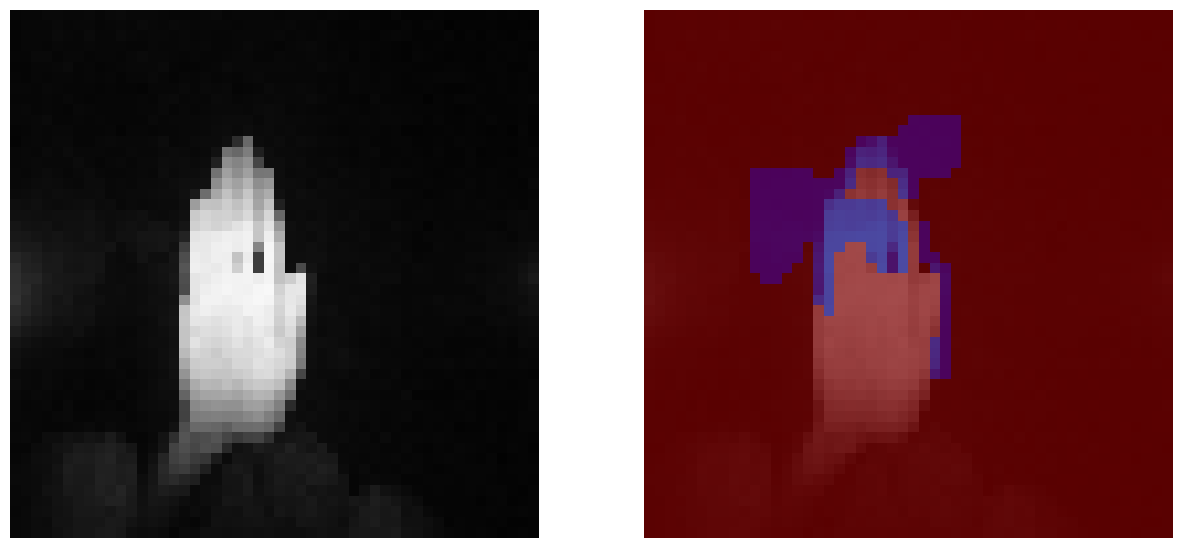

In [102]:
import numpy as np
from skimage.segmentation import slic
from skimage.color import gray2rgb
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from lime import lime_image
import matplotlib.pyplot as plt
import keras
import keras.backend as K
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

# Define the image data generator and load the test set
image_datagen = ImageDataGenerator(rescale=1./255, dtype='float32')
test_set = image_datagen.flow_from_directory('Train_Final/leapGestRecog/01',
                                             target_size=(50, 50),
                                             batch_size=32,
                                             class_mode='categorical')

# Load the trained model
model = keras.models.Sequential()

###
model.add(Conv2D(128, (5, 5), activation='relu', input_shape=(50, 50, 3)))
###
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

######
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))
######

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))
#####
model.add(Dense(128, activation='relu'))
#####
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
         optimizer = 'adam',
         metrics = ['accuracy'])

# history = model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test))
#history = model.fit(train_generator, epochs = 10, batch_size=32)

# Choose a random sample from the test set
sample_idx = np.random.choice(len(test_set))
sample_image = test_set[sample_idx][0][0]

# Reshape the sample_image to match the expected input shape of the model
sample_image = np.expand_dims(sample_image, axis=0)

# Apply superpixel segmentation using SLIC algorithm
segments = slic(sample_image[0], n_segments=100, compactness=10, sigma=1)

# Create the LimeImageExplainer object
explainer = lime_image.LimeImageExplainer()

# Define the prediction function
def predict_fn(images):
    return model.predict(images)

# Explain the image using Anchor Explanations
explanation = explainer.explain_instance(sample_image[0], predict_fn, top_labels=1, num_samples=1000, segmentation_fn=lambda x: segments)

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(sample_image[0])
#plt.title('Original Image')
plt.axis("off")

# Show the Anchor explanation
plt.subplot(1, 2, 2)
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(temp)
plt.imshow(mask, cmap='jet', alpha=0.7)
#plt.title('Anchor Explanation')
plt.axis("off")

# Increase figure size
fig = plt.gcf()
fig.set_size_inches(15, 8)

plt.show()


### SHAP Implementation

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..

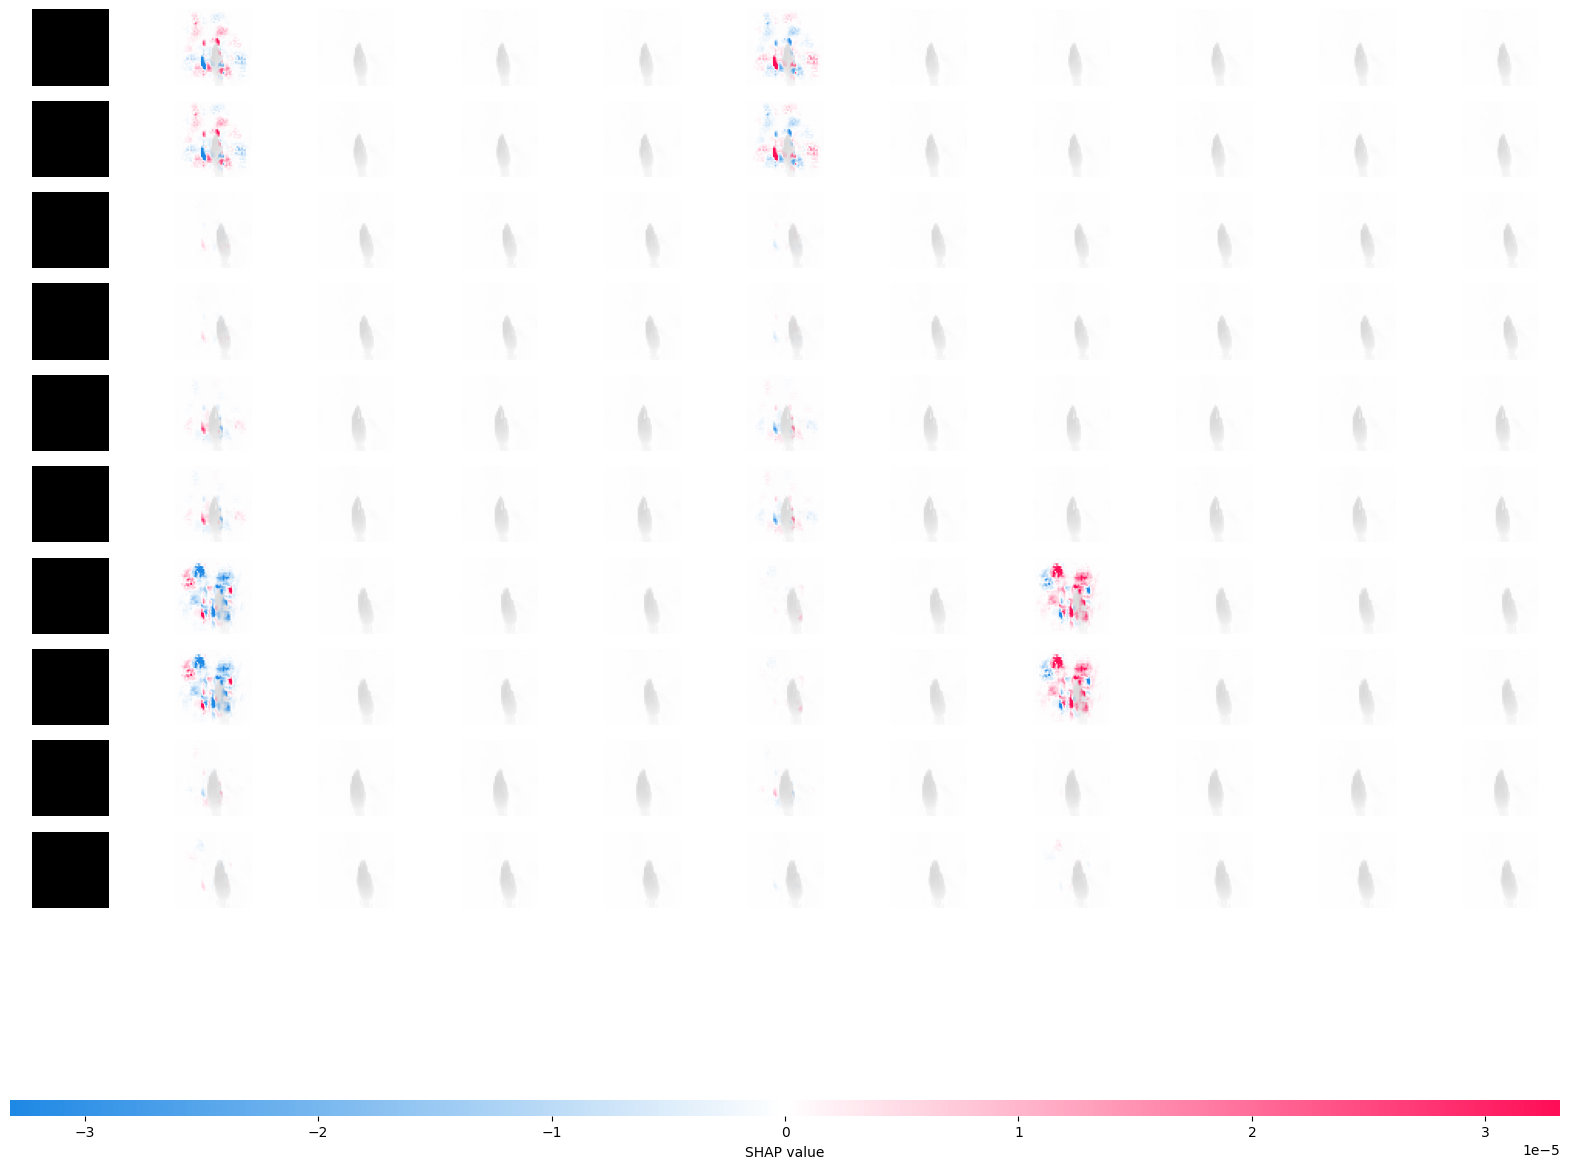

In [25]:
import shap
import numpy as np

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=True)]

# explain predictions of the model on nine images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[1:11])

# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:11])